# Multi-Class Prediction of Obesity Risk
### Kaggle Competition

column max_columns daisplay [fix](https://github.com/jupyterlab/jupyterlab/issues/14625#issuecomment-1722137537) for Firefox

Firstly, we work with the [original](https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster) dataset

#### Packages and Libraries:
 * Plotly



Firstly, we'll work with the [original](https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster) dataset

## TOC: <a class="anchor" id="TOC" name="TOC"></a>
* [Data Preprossing and Analysis](#prep)
    * [Encode](#encode)
* [KNN](#KNN)
* [Decision Tree](#DT)
* [Neural Network](#NN)
* [Support Vector Machine](#SVM)

In [1]:
import tensorflow as tf

# Check if CUDA is available
print("Is CUDA available:", tf.test.is_built_with_cuda())

# List CUDA devices (GPUs) available to TensorFlow
if tf.test.is_built_with_cuda():
    print("CUDA Devices:", tf.config.list_physical_devices('GPU'))


2024-02-05 01:06:59.188558: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-05 01:06:59.188589: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-05 01:06:59.189903: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-05 01:06:59.197619: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-05 01:07:00.119667: W tensorflow/compiler/tf2

Is CUDA available: True
CUDA Devices: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2024-02-05 01:07:01.128187: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-05 01:07:01.177261: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-05 01:07:01.177488: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

# **Data Preprocessing and Analysis** <a class="anchor" id="prep" name="prep"></a>

In [2]:
import pandas as pd
from IPython.display import display, HTML
pd.set_option('display.max_columns', 85)
pd.option_context("display.max_rows", 10, "display.max_columns", 18)
display(HTML("<style>.jp-OutputArea-output {display:flex}</style>")) # column width display fix for Firefox

# df = pd.read_csv('data/ObesityDataSet.csv') # Original dataset 
df = pd.read_csv('data/train.csv')

pd.options.display.max_columns = None
print(df.shape)
df.head()

(20758, 18)


id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

In [4]:
df.NObeyesdad.value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I']


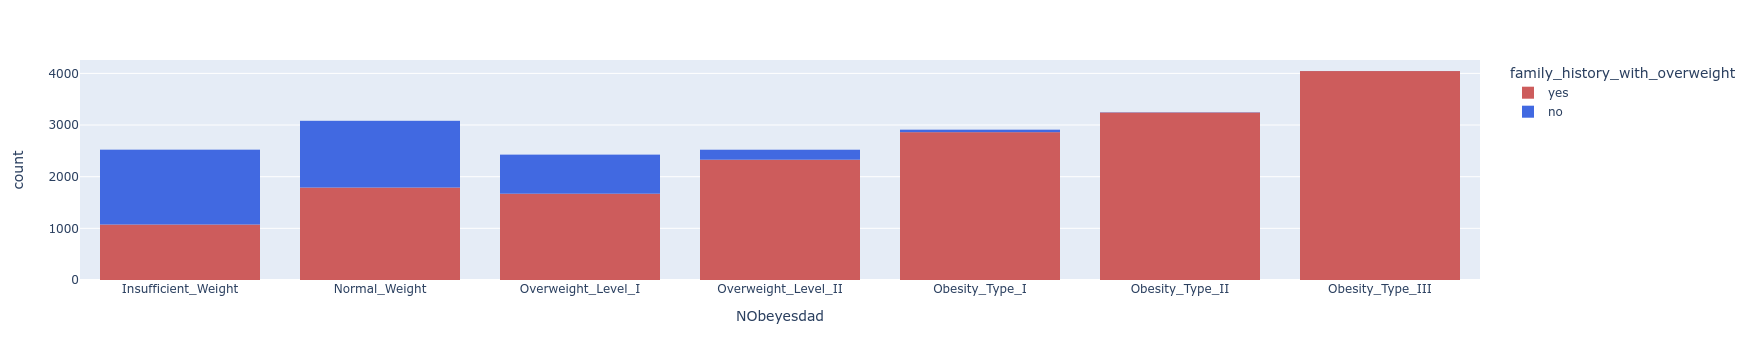

In [5]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import plotly.express as px
color_map = {'yes': 'indianred', 'no': 'royalblue'}

obesity_list = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 
                 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

print(df.NObeyesdad.unique())
px.histogram(df, x='NObeyesdad', color='family_history_with_overweight', 
             category_orders={'NObeyesdad': obesity_list}, color_discrete_map=color_map) # .update_xaxes(categoryorder='total ascending')

*NObeyesdad* column will serve as our *target attribute*, also known as ***ground truth***

As we may observe from the histogram, the distribution of weight categories is approximately equal. 
Additionally, we may note the impact of genetics on the occurrence of obesity. 
Among participants categorised as "Insufficient Weight", "Normal Weight" and "Overweight Level I" a significant number have no family history of obesity. This suggests a correlation between genetic predisposition and obesity occurrence. Interestingly, the more severe the overweight category, the fewer people report family history with overweight.

We will create heatmaps in order to perform a more thorough examination of the influence of specific features on obesity.

For that reason we ought to convert non-numerical entries into numbers

### Inspect for outliers or erroneous entries

In [6]:
import matplotlib.pyplot as plt
import seaborn as sb
string_columns = df.select_dtypes(include='object').columns
str_cols = string_columns

if len(str_cols) == 0:
  print("There are not string columns")
  raise SystemExit   # Exit the program
print("------------------- columns with strs -------------------\n")
print(str_cols)

# Filter string columns based on the number of unique values
more_than_two_unique = [col for col in string_columns if df[col].nunique() > 2]
two_unique = [col for col in string_columns if df[col].nunique() == 2]

# Set up the figure and axis for the subplots
n_cols = 2
n_rows = (len(more_than_two_unique) + len(two_unique) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

# Iterate through the string columns with more than two unique values and create a bar plot for each
for idx, col in enumerate(more_than_two_unique):
    ax = axes[idx // n_cols, idx % n_cols]
    sb.countplot(data=df, y=col, ax=ax)  # Use 'y' parameter for horizontal bars
    ax.set_title(f'Counts of Unique Values in "{col}" Column')

# Iterate through the string columns with exactly two unique values and create a bar plot for each
for idx, col in enumerate(two_unique, start=len(more_than_two_unique)):
    ax = axes[idx // n_cols, idx % n_cols]
    sb.countplot(data=df, y=col, ax=ax, palette="pastel")  # Use a different color palette
    ax.set_title(f'Counts of Unique Values in "{col}" Column')

# Remove empty subplots
for idx in range(len(more_than_two_unique) + len(two_unique), n_rows * n_cols):
    fig.delaxes(axes[idx // n_cols, idx % n_cols])

plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
import seaborn as sb
# select integer columns
float_cols = list(df.select_dtypes(include=['int', 'float']).columns)
sublist = [float_cols[i:i+4] for i in range(0, len(float_cols), 5)]
print("------------------- columns with floats -------------------\n")
print(float_cols)
print("-----------------------------------------------------------\n")
for sub in sublist:
  print(f"{sub}")
  sb.pairplot(df[sub].dropna())

after analysing the distribution graphs, no clear outliers were found, which is unusual for real-world data. We will assume that the data was intentionally predefined for learning purposes.

##### We may separate the entries by age category to prove or disprove the [assumption that metabolism slows with age](https://health.osu.edu/wellness/aging/does-metabolism-really-slow-down-with-age)

In [7]:
import matplotlib.pyplot as plt

minors_count = df[df.Age < 18].shape[0]
young_adults_1_count = df[(df.Age >= 18) & (df.Age < 25)].shape[0]
adults_count = df[(df.Age >= 25) & (df.Age < 35)].shape[0]
middle_aged_count = df[df.Age >= 35].shape[0]

categories = ['Minors', 'Young Adults 18-24', 'Adults 25-34', 'Middle Aged 35+']
counts = [minors_count, young_adults_1_count, adults_count, middle_aged_count]

plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color=['blue', 'orange', 'green', 'red'])
plt.title('Number of Entries by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Number of Entries')
plt.xticks()
plt.show()


ModuleNotFoundError: No module named 'matplotlib'

In [8]:
oldest_participant = df.loc[df.Age.idxmax()]
oldest_participant

id                                              5646
Gender                                          Male
Age                                             61.0
Height                                          1.75
Weight                                          79.0
family_history_with_overweight                   yes
FAVC                                             yes
FCVC                                             3.0
NCP                                              3.0
CAEC                                       Sometimes
SMOKE                                             no
CH2O                                             2.0
SCC                                               no
FAF                                              2.0
TUE                                              0.0
CALC                                       Sometimes
MTRANS                                    Automobile
NObeyesdad                        Overweight_Level_I
Name: 5646, dtype: object

Although the age distribution of participants is uneven, with a notably smaller number of older participants, we lack sufficient evidence to classify these older entries as outliers. To achieve a more robust model, we should aim to either increase the number of participants for a more balanced distribution across age categories or consider excluding the older and minor categories due to their insufficient representation.

We **do not have enough grounds to suggest that age significantly affect weight gain**, as the middle aged and underaged categories are underrepresented. 

#### Convert to numerical representation
### **Encode** <a class="anchor" id="encode" name="encode"></a>
[Go to Top](#TOC)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [10]:
string_columns = []
for i in list(df.columns):
    if df[i].dtype != 'float64' and df[i].dtype != 'int64':
        # print(f"{i}: {df[i].unique()}")
        string_columns.append(i)
string_columns

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

We could use scikit-learn's LabelEncoder.
~~~~
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in string_columns:
    df[col] = le.fit_transform(df[col])

print(df.head())

~~~~
However, as mentioned [here](https://github.com/AlexanderNixon/Machine-learning-reads/blob/master/How-to-encode-ordinal-features.ipynb) LabelEncoder does not assign numbers based on the semantic meaning of these words, but simply assigns values based on the alphabetical or lexicographical order of the categories it encounters. This can lead to misinterpretations, especially in the case of ordinal data where the order of categories carries meaningful information. The better and more appropriate approach would be to assign numbers to categories based on the meaning, i.e


Insufficient_Weight - 0, Normal_Weight - 1, ... , Obesity_Type_III - 6



In [11]:
df.NObeyesdad.dtype not in ['float', 'int']

True

In [3]:
def my_encode(df):
    yes_no_order = {'no': 0, 'yes': 1}
    if df.SMOKE.dtype not in ['float', 'int']:
        df['SMOKE'] = df['SMOKE'].map(yes_no_order)
    if df.FAVC.dtype not in ['float', 'int']:
        df['FAVC'] = df['FAVC'].map(yes_no_order)
    if df.SCC.dtype not in ['float', 'int']:
        df['SCC'] = df['SCC'].map(yes_no_order)
    if df.family_history_with_overweight.dtype not in ['float', 'int']:
        df['family_history_with_overweight'] = df['family_history_with_overweight'].map(yes_no_order)
    
    gender_map = {'Female': 0, 'Male': 1}
    if df.Gender.dtype not in ['float', 'int']:
        df['Gender'] = df['Gender'].map(gender_map)
    
    obesity_map = {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 'Overweight_Level_II': 3, 
                  'Obesity_Type_I': 4, 'Obesity_Type_II': 5, 'Obesity_Type_III': 6} 
    if 'NObeyesdad' in df.columns:
        if df.NObeyesdad.dtype not in ['float', 'int']:
            df['NObeyesdad'] = df['NObeyesdad'].map(obesity_map)
    
    transport_order = { 
        'Bike': 0, 
        'Walking': 1, 
        'Public_Transportation': 2, 
        'Motorbike': 3, 
        'Automobile': 4 
    }
    if df.MTRANS.dtype not in ['float', 'int']:
        df['MTRANS'] = df['MTRANS'].map(transport_order)
    
    frequency_order = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
    
    if df.CAEC.dtype not in ['float', 'int']:
        df['CAEC'] = df['CAEC'].map(frequency_order)
    if df.CALC.dtype not in ['float', 'int']:
        df['CALC'] = df['CALC'].map(frequency_order)

def my_decode(res_df):
    obesity_map = {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 'Overweight_Level_II': 3, 
              'Obesity_Type_I': 4, 'Obesity_Type_II': 5, 'Obesity_Type_III': 6} 
    reverse_obesity_map = {v: k for k, v in obesity_map.items()}
    res_df['NObeyesdad'] = res_df['NObeyesdad'].map(reverse_obesity_map)

In [11]:
my_encode(df)

In [12]:
df.head()

id  Gender        Age    Height      Weight  \
0   0       1  24.443011  1.699998   81.669950   
1   1       0  18.000000  1.560000   57.000000   
2   2       0  18.000000  1.711460   50.165754   
3   3       0  20.952737  1.710730  131.274851   
4   4       1  31.641081  1.914186   93.798055   

   family_history_with_overweight  FAVC      FCVC       NCP  CAEC  SMOKE  \
0                               1     1  2.000000  2.983297     1      0   
1                               1     1  2.000000  3.000000     2      0   
2                               1     1  1.880534  1.411685     1      0   
3                               1     1  3.000000  3.000000     1      0   
4                               1     1  2.679664  1.971472     1      0   

       CH2O  SCC       FAF       TUE  CALC  MTRANS  NObeyesdad  
0  2.763573    0  0.000000  0.976473     1       2           3  
1  2.000000    0  1.000000  1.000000     0       4           1  
2  1.910378    0  0.866045  1.673584     0       2           0  
3  1.674061    0  1.467863  0.780199     1       2           6  
4  1.979848    0  1.967973  0.931721     1       2           3

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your dataframe and it's already loaded and preprocessed
# Ensure that 'NObeyesdad' is mapped to numerical values as needed

# Number of columns in df
num_cols = len(df.columns)

# Make sure 'NObeyesdad' column is in the dataframe
if 'NObeyesdad' not in df.columns:
    print("The 'NObeyesdad' column does not exist in the dataframe.")



# Loop over each set of 10 columns
for i in range(0, num_cols, 10):
    # Select columns
    if i + 10 < num_cols:
        cols = df.columns[i:i+10]
    else:
        # In case there are fewer than 10 columns left in the last iteration
        cols = df.columns[i:]

    # Always include 'NObeyesdad' column
    if 'NObeyesdad' not in cols:
        cols = cols.insert(len(cols), 'NObeyesdad')

    # Compute correlation and create heatmap
    corr = df[cols].corr()
    plt.figure(figsize=(10,8))
    sns.heatmap(corr, cmap='coolwarm', annot=True)
    plt.title(f"Heatmap for columns {i+1} to {min(i+10, num_cols)}")
    plt.show()


ModuleNotFoundError: No module named 'seaborn'

In [15]:
correlation_matrix = df.corr()

In [16]:
influence = correlation_matrix[(correlation_matrix.NObeyesdad > 0.1) | (correlation_matrix.NObeyesdad < -0.1)]

In [17]:
dict(influence.NObeyesdad)

{'Age': 0.3562110538376184,
 'Height': 0.15014107608414867,
 'Weight': 0.921250303589431,
 'family_history_with_overweight': 0.5220256186068654,
 'FAVC': 0.21540067158028978,
 'FCVC': 0.27293289452148317,
 'CAEC': -0.3640517375455865,
 'CH2O': 0.27315370852277887,
 'SCC': -0.184959336907074,
 'FAF': -0.23474454130372188,
 'TUE': -0.12100862043252815,
 'CALC': 0.18936104338046592,
 'NObeyesdad': 1.0}

**These features influence obesity the most**

# Modelling

### **K-nearest neighbor** <a class="anchor" id="KNN" name="KNN"></a>
[Go to Top](#TOC)

In [18]:
X = df.iloc[:, 1:-1]# Features
X.head()

y = df.iloc[:, -1]
y.head()

0    3
1    1
2    0
3    6
4    3
Name: NObeyesdad, dtype: int64

In [56]:
# Step 1: Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# Assuming the last column is the target variable
X = df.iloc[:, 1:-1].values  # Features
y = df.iloc[:, -1].values   # Target variable

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

# Verify the shapes of the datasets
print("Training input set shape:", X_train.shape)
print("Testing input set shape:", X_test.shape)

# Step 4: Create KNN model
# You can change n_neighbors to use a different number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Step 5: Fit the model with the training data
knn_classifier.fit(X_train, y_train)

# Step 6: Make predictions on the testing set
y_pred = knn_classifier.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


accuracy = knn_classifier.score(X_test, y_test)
accuracy

Training input set shape: (15568, 16)
Testing input set shape: (5190, 16)
Accuracy: 83.29%


0.8329479768786127

 ### Prevent overfitting 
 The model achieves +=90 of accuracy. However, the model will perform differently depending on the subset of the data it was trained on

scikit_learn's **train_test_split** function separates the data to train and test using a random number generator. 
That's why it's worth examining how the model would perform when the data is separated in different ways.
Additionally, it's worth noting that computers are not able to generate truly random numbers, but rather [pseudorandom](https://stackoverflow.com/questions/4156907/why-is-random-not-so-random)

more about [pseudorandomness](https://engineering.mit.edu/engage/ask-an-engineer/can-a-computer-generate-a-truly-random-number/)

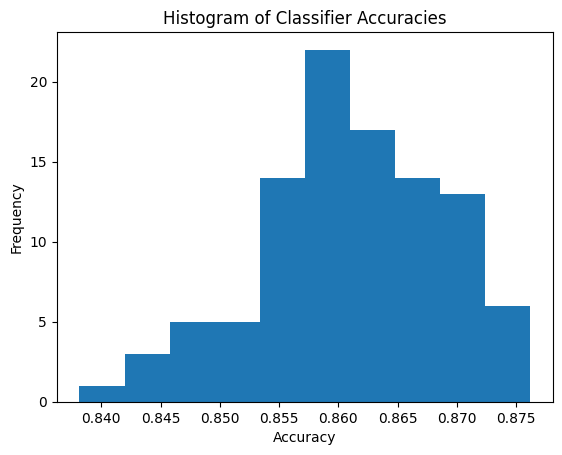

In [46]:
accuracies = []
num_experiments = 100

for _ in range(num_experiments):
    # Create a new train-test split for each experiment
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=None)
    
    # Create an instance of the DecisionTreeClassifier
    knn_classifier = KNeighborsClassifier(n_neighbors=7, weights='uniform', metric='manhattan')
    
    # Train the classifier on the training set
    knn_classifier.fit(X_train, y_train)
    
    # Evaluate the classifier on the testing set
    accuracy = knn_classifier.score(X_test, y_test)
    
    # Append the accuracy to the list
    accuracies.append(accuracy)

# Plotting the histogram
plt.hist(accuracies, bins=10)
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Histogram of Classifier Accuracies')
plt.show()


We'll utilize K-fold cross-validation to mitigate the risk of overfitting

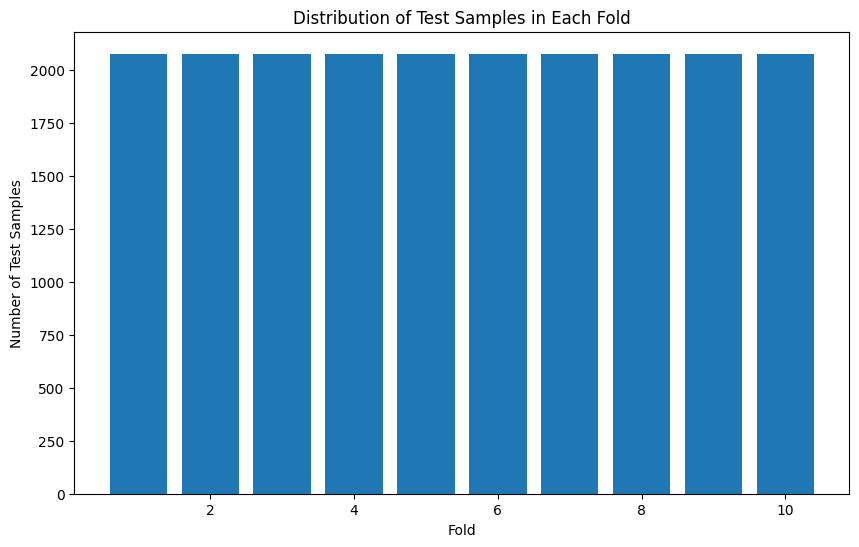

In [31]:
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import numpy as np

# Select all columns except the target column
all_inputs = df.iloc[:, 1:-1].values
all_targets = df['NObeyesdad'].values

def plot_cv(cv, features, labels):
    fold_sizes = []
    
    for i, (train, test) in enumerate(cv.split(features, labels)):
        fold_sizes.append(len(test))
    
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(fold_sizes) + 1), fold_sizes)
    plt.xlabel('Fold')
    plt.ylabel('Number of Test Samples')
    plt.title('Distribution of Test Samples in Each Fold')

plot_cv(StratifiedKFold(n_splits=10), all_inputs, all_targets)


All folds are of equal height, which confirms that StratifiedKFold has evenly distributed the data across each fold.
If there was significant difference in the heights of the bars, it would indicate an uneven distribution of instances across folds.

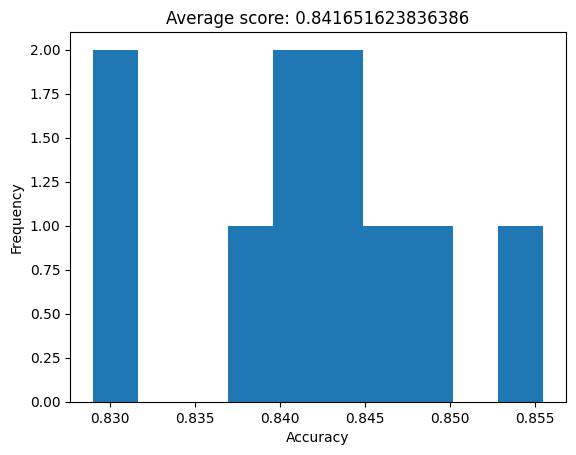

[0.84489403 0.82899807 0.84874759 0.82947977 0.84007707 0.85549133
 0.83911368 0.84200385 0.84385542 0.84385542]


In [41]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=10)
cv_scores = cross_val_score(knn_classifier, all_inputs, all_targets, cv=cv)

plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()
print(cv_scores)

### Find the best parameters for the knn classifier

In [51]:
input, target = df.iloc[:, 1:-1], df.iloc[:, -1]
input

Gender        Age    Height      Weight  \
0           1  24.443011  1.699998   81.669950   
1           0  18.000000  1.560000   57.000000   
2           0  18.000000  1.711460   50.165754   
3           0  20.952737  1.710730  131.274851   
4           1  31.641081  1.914186   93.798055   
...       ...        ...       ...         ...   
20753       1  25.137087  1.766626  114.187096   
20754       1  18.000000  1.710000   50.000000   
20755       1  20.101026  1.819557  105.580491   
20756       1  33.852953  1.700000   83.520113   
20757       1  26.680376  1.816547  118.134898   

       family_history_with_overweight  FAVC      FCVC       NCP  CAEC  SMOKE  \
0                                   1     1  2.000000  2.983297     1      0   
1                                   1     1  2.000000  3.000000     2      0   
2                                   1     1  1.880534  1.411685     1      0   
3                                   1     1  3.000000  3.000000     1      0   
4                                   1     1  2.679664  1.971472     1      0   
...                               ...   ...       ...       ...   ...    ...   
20753                               1     1  2.919584  3.000000     1      0   
20754                               0     1  3.000000  4.000000     2      0   
20755                               1     1  2.407817  3.000000     1      0   
20756                               1     1  2.671238  1.971472     1      0   
20757                               1     1  3.000000  3.000000     1      0   

           CH2O  SCC       FAF       TUE  CALC  MTRANS  
0      2.763573    0  0.000000  0.976473     1       2  
1      2.000000    0  1.000000  1.000000     0       4  
2      1.910378    0  0.866045  1.673584     0       2  
3      1.674061    0  1.467863  0.780199     1       2  
4      1.979848    0  1.967973  0.931721     1       2  
...         ...  ...       ...       ...   ...     ...  
20753  2.151809    0  1.330519  0.196680     1       2  
20754  1.000000    0  2.000000  1.000000     1       2  
20755  2.000000    0  1.158040  1.198439     0       2  
20756  2.144838    0  0.000000  0.973834     0       4  
20757  2.003563    0  0.684487  0.713823     1       2  

[20758 rows x 16 columns]

In [52]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

input, target = df.iloc[:, 1:-1].values, df.iloc[:, -1].values

knn_classifier = KNeighborsClassifier()

parameter_grid = {
    'n_neighbors': range(2, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

cross_validation = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(
    estimator=knn_classifier,
    param_grid=parameter_grid,
    cv=cross_validation
)

grid_search.fit(input, target)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.8618363776121918
Best parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}


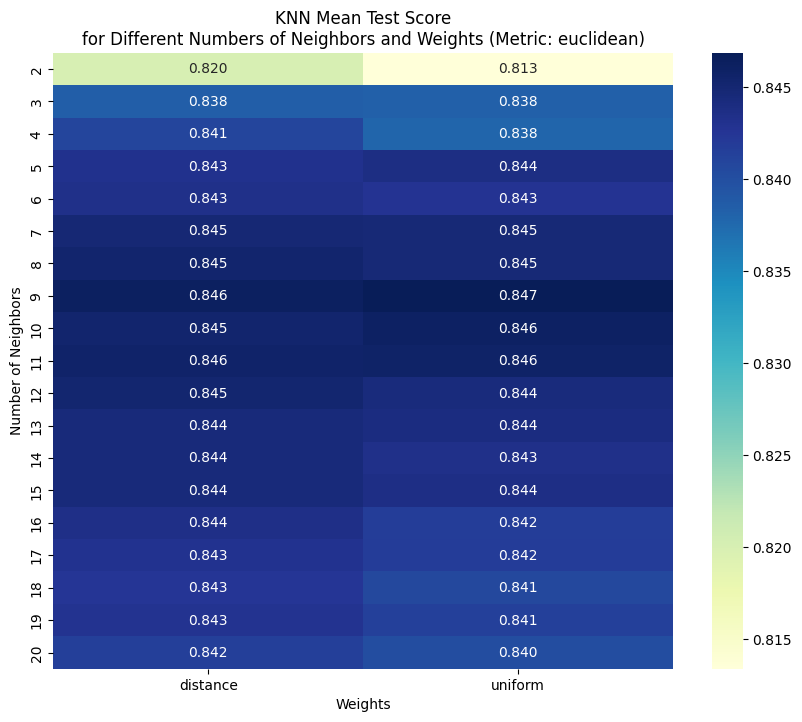

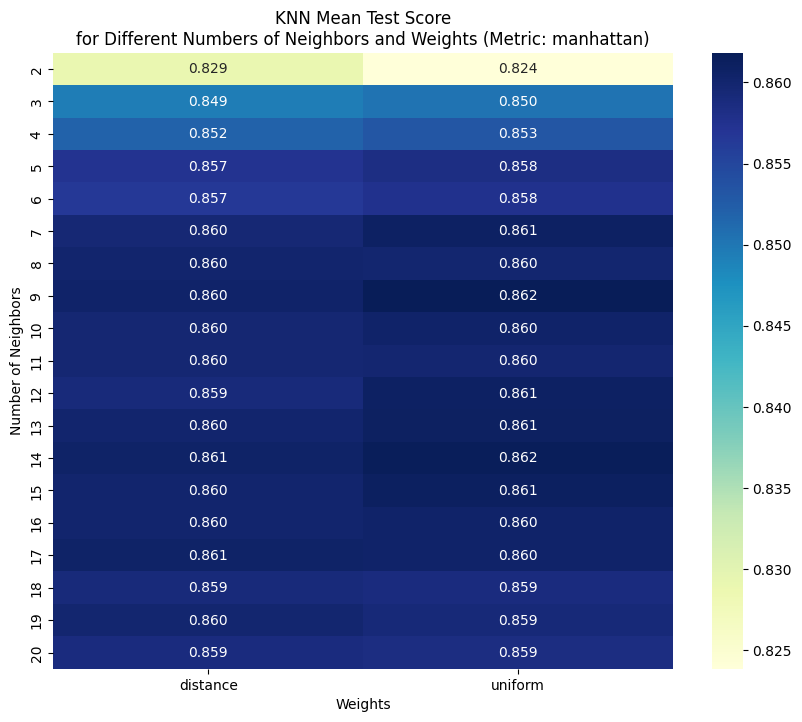

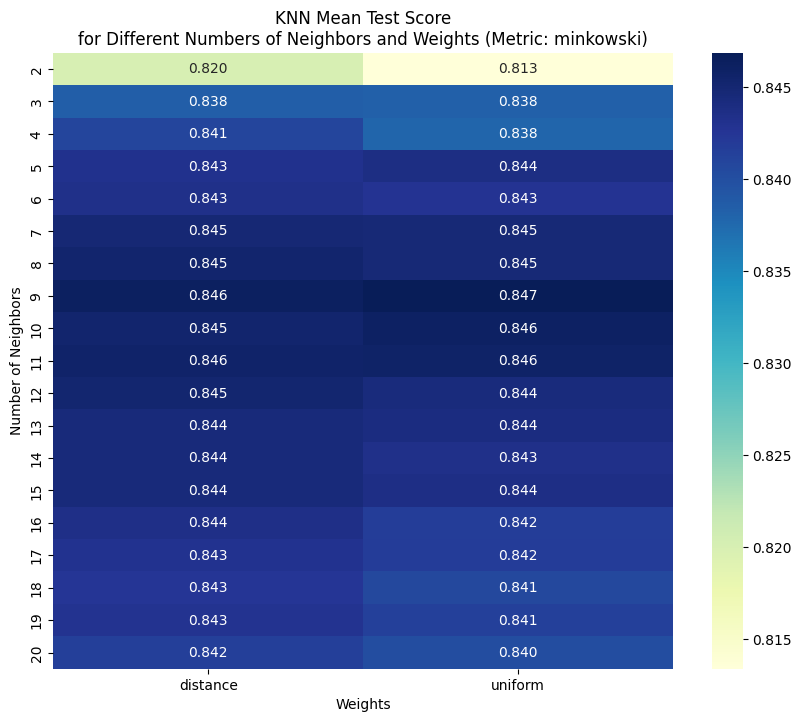

In [53]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np

# Convert the grid search results into a DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Assuming the 'metric' parameter is fixed to 'euclidean' for the purpose of visualization
# Filter the results for each combination of 'n_neighbors' and 'weights' for the 'euclidean' metric
metrics = ['euclidean', 'manhattan', 'minkowski']
for metric in metrics:
    results_filtered = results_df[results_df['param_metric'] == metric]
    
    # Pivot the data for the heatmap
    # Correcting the pivot_table syntax
    pivot_table = results_filtered.pivot(index="param_n_neighbors", columns="param_weights", values="mean_test_score")
    
    
    # Create the heatmap
    plt.figure(figsize=(10, 8))
    sb.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".3f")
    plt.title(f'KNN Mean Test Score\nfor Different Numbers of Neighbors and Weights (Metric: {metric})')
    plt.xlabel('Weights')
    plt.ylabel('Number of Neighbors')
    plt.show()


In [81]:
# Step 1: Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# Assuming the last column is the target variable
X = df.iloc[:, 1:-1].values  # Features
y = df.iloc[:, -1].values   # Target variable

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Verify the shapes of the datasets
print("Training input set shape:", X_train.shape)
print("Testing input set shape:", X_test.shape)

# Step 4: Create KNN model
# You can change n_neighbors to use a different number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=8, weights='uniform', metric='manhattan')

# Step 5: Fit the model with the training data
knn_classifier.fit(X_train, y_train)

# Step 6: Make predictions on the testing set
y_pred = knn_classifier.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


accuracy = knn_classifier.score(X_test, y_test)
accuracy

Training input set shape: (16606, 16)
Testing input set shape: (4152, 16)
Accuracy: 86.34%


0.8634393063583815

In [82]:
from sklearn.metrics import classification_report

# Reverse the obesity map to get class indices from the class names
reverse_obesity_map = {v: k for k, v in obesity_map.items()}

# Generate a classification report with actual class names
report = classification_report(
    y_test,
    y_pred,
    target_names=[reverse_obesity_map[i] for i in range(len(reverse_obesity_map))]
)
print(report)


                     precision    recall  f1-score   support

Insufficient_Weight       0.87      0.94      0.91       522
      Normal_Weight       0.81      0.78      0.80       632
 Overweight_Level_I       0.74      0.69      0.71       511
Overweight_Level_II       0.74      0.74      0.74       498
     Obesity_Type_I       0.84      0.85      0.84       571
    Obesity_Type_II       0.97      0.96      0.96       632
   Obesity_Type_III       0.99      1.00      0.99       786

           accuracy                           0.86      4152
          macro avg       0.85      0.85      0.85      4152
       weighted avg       0.86      0.86      0.86      4152



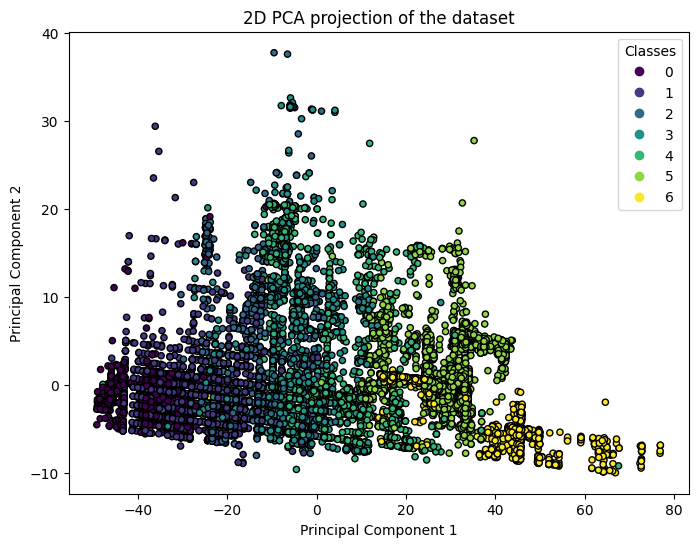

In [84]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Assuming X is your 16-dimensional input data and y is the target
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=20)
plt.legend(*scatter.legend_elements(), title="Classes")
plt.title("2D PCA projection of the dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


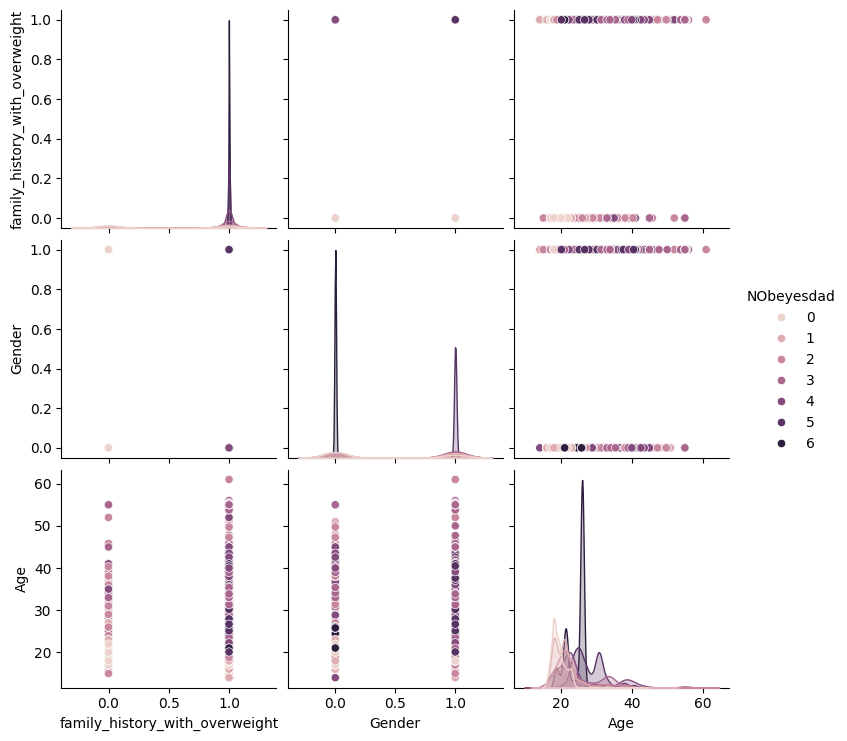

In [85]:
import seaborn as sns

sns.pairplot(df[['family_history_with_overweight', 'Gender', 'Age', 'NObeyesdad']], hue='NObeyesdad')
plt.show()

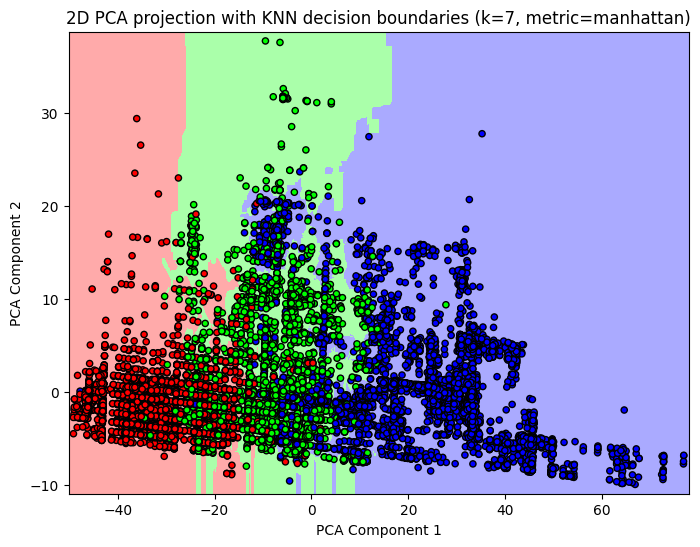

In [87]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Perform PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Train a new KNN model on the 2D PCA-projected data
k = 7
metric='manhattan'
weights='uniform'
knn_2d = KNeighborsClassifier(n_neighbors=k, weights=weights, metric=metric)
knn_2d.fit(X_pca, y)


# Create color maps for plotting
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Set up mesh grid for the decision boundary plot
h = .02  # step size in the mesh
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict class using the mesh grid
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"2D PCA projection with KNN decision boundaries (k={k}, metric={metric})")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.show()


## Generate result
Create KNN classifier with the best metrics

In [135]:
df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [136]:
print(len(test_df))
print(len(df))

13840
20758


In [137]:
yes_no_order = {'no': 0, 'yes': 1}
if df.SMOKE.dtype not in ['float', 'int']:
    df['SMOKE'] = df['SMOKE'].map(yes_no_order)
if df.FAVC.dtype not in ['float', 'int']:
    df['FAVC'] = df['FAVC'].map(yes_no_order)
if df.SCC.dtype not in ['float', 'int']:
    df['SCC'] = df['SCC'].map(yes_no_order)
if df.family_history_with_overweight.dtype not in ['float', 'int']:
    df['family_history_with_overweight'] = df['family_history_with_overweight'].map(yes_no_order)

gender_map = {'Female': 0, 'Male': 1}
if df.Gender.dtype not in ['float', 'int']:
    df['Gender'] = df['Gender'].map(gender_map)

obesity_map = {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 'Overweight_Level_II': 3, 
              'Obesity_Type_I': 4, 'Obesity_Type_II': 5, 'Obesity_Type_III': 6} 

if df.NObeyesdad.dtype not in ['float', 'int']:
    df['NObeyesdad'] = df['NObeyesdad'].map(obesity_map)

transport_order = { 
    'Bike': 0, 
    'Walking': 1, 
    'Public_Transportation': 2, 
    'Motorbike': 3, 
    'Automobile': 4 
}
if df.MTRANS.dtype not in ['float', 'int']:
    df['MTRANS'] = df['MTRANS'].map(transport_order)

frequency_order = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}

if df.CAEC.dtype not in ['float', 'int']:
    df['CAEC'] = df['CAEC'].map(frequency_order)
if df.CALC.dtype not in ['float', 'int']:
    df['CALC'] = df['CALC'].map(frequency_order)

In [138]:
yes_no_order = {'no': 0, 'yes': 1}
if test_df.SMOKE.dtype not in ['float', 'int']:
    test_df['SMOKE'] = test_df['SMOKE'].map(yes_no_order)
if test_df.FAVC.dtype not in ['float', 'int']:
    test_df['FAVC'] = test_df['FAVC'].map(yes_no_order)
if test_df.SCC.dtype not in ['float', 'int']:
    test_df['SCC'] = test_df['SCC'].map(yes_no_order)
if test_df.family_history_with_overweight.dtype not in ['float', 'int']:
    test_df['family_history_with_overweight'] = test_df['family_history_with_overweight'].map(yes_no_order)

gender_map = {'Female': 0, 'Male': 1}
if test_df.Gender.dtype not in ['float', 'int']:
    test_df['Gender'] = test_df['Gender'].map(gender_map)

transport_order = { 
    'Bike': 0, 
    'Walking': 1, 
    'Public_Transportation': 2, 
    'Motorbike': 3, 
    'Automobile': 4 
}
if test_df.MTRANS.dtype not in ['float', 'int']:
    test_df['MTRANS'] = test_df['MTRANS'].map(transport_order)

frequency_order = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
if test_df.CAEC.dtype not in ['float', 'int']:
    test_df['CAEC'] = test_df['CAEC'].map(frequency_order)
if test_df.CALC.dtype not in ['float', 'int']:
    test_df['CALC'] = test_df['CALC'].map(frequency_order)


In [139]:
test_df.head()

id  Gender        Age    Height      Weight  \
0  20758       1  26.899886  1.848294  120.644178   
1  20759       0  21.000000  1.600000   66.000000   
2  20760       0  26.000000  1.643355  111.600553   
3  20761       1  20.979254  1.553127  103.669116   
4  20762       0  26.000000  1.627396  104.835346   

   family_history_with_overweight  FAVC      FCVC       NCP  CAEC  SMOKE  \
0                               1     1  2.938616  3.000000     1      0   
1                               1     1  2.000000  1.000000     1      0   
2                               1     1  3.000000  3.000000     1      0   
3                               1     1  2.000000  2.977909     1      0   
4                               1     1  3.000000  3.000000     1      0   

       CH2O  SCC       FAF       TUE  CALC  MTRANS  
0  2.825629    0  0.855400  0.000000     1       2  
1  3.000000    0  1.000000  0.000000     1       2  
2  2.621877    0  0.000000  0.250502     1       2  
3  2.786417    0  0.094851  0.000000     1       2  
4  2.653531    0  0.000000  0.741069     1       2

In [140]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

# Extract features and labels
X = df.iloc[:, 1:-1].values  # Features from df
y = df.iloc[:, -1].values    # Labels from df

# Create KNN model
knn_classifier = KNeighborsClassifier(n_neighbors=8, weights='uniform', metric='manhattan')

# Fit the model with all available labeled data
knn_classifier.fit(X, y)

# Now, let's assume test_df is properly preprocessed and matches the feature space of df
X_test_df = test_df.iloc[:, 1:].values  # Extract features from test_df

# Make predictions on the new data
y_test_df_pred = knn_classifier.predict(X_test_df)

# You can now use y_test_df_pred as your predicted labels for test_df
# For instance, you could add them to the test_df DataFrame:
test_df['NObeyesdad'] = y_test_df_pred


In [151]:
# res_df = test_df[['id', 'NObeyesdad']]
res_df.head()

id          NObeyesdad
0  20758     Obesity_Type_II
1  20759  Overweight_Level_I
2  20760    Obesity_Type_III
3  20761      Obesity_Type_I
4  20762    Obesity_Type_III

In [150]:
reverse_obesity_map = {v: k for k, v in obesity_map.items()}
res_df['NObeyesdad'] = res_df['NObeyesdad'].map(reverse_obesity_map)

/tmp/ipykernel_35550/2303980607.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [152]:

# Save the predictions to a new CSV file if needed
res_df.to_csv('data/test_predictions.csv', index=False)


In [146]:
len(res_df)

13840

## **Decision Tree** <a class="anchor" id="DT" name="DT"></a>
[Go to Top](#TOC)

In [5]:
import pandas as pd
df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
df.head()

id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

In [6]:
my_encode(df)
input_not_encode = df.iloc[:, 1:-1] # all columns except id and target
print(len(input_not_encode.columns))
input = input_not_encode.values
target = df['NObeyesdad'] # target
input_not_encode.head()

16


Gender        Age    Height      Weight  family_history_with_overweight  \
0       1  24.443011  1.699998   81.669950                               1   
1       0  18.000000  1.560000   57.000000                               1   
2       0  18.000000  1.711460   50.165754                               1   
3       0  20.952737  1.710730  131.274851                               1   
4       1  31.641081  1.914186   93.798055                               1   

   FAVC      FCVC       NCP  CAEC  SMOKE      CH2O  SCC       FAF       TUE  \
0     1  2.000000  2.983297     1      0  2.763573    0  0.000000  0.976473   
1     1  2.000000  3.000000     2      0  2.000000    0  1.000000  1.000000   
2     1  1.880534  1.411685     1      0  1.910378    0  0.866045  1.673584   
3     1  3.000000  3.000000     1      0  1.674061    0  1.467863  0.780199   
4     1  2.679664  1.971472     1      0  1.979848    0  1.967973  0.931721   

   CALC  MTRANS  
0     1       2  
1     0       4  
2     0       2  
3     1       2  
4     1       2

In [7]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

test_size = 0.2 
random_state = 40
input_train, input_test, target_train, target_test = train_test_split(input, target, test_size=test_size, random_state=random_state)

# Verify the shapes of the datasets
print("Training input set shape:", input_train.shape)
print("Testing input set shape:", input_test.shape)

# Create an instance of the DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=random_state)

# Train the classifier on the training set
classifier.fit(input_train, target_train)

# Evaluate the classifier on the testing set
accuracy = classifier.score(input_test, target_test)

# Print the final score/accuracy
print("Classifier Accuracy:", accuracy)


Training input set shape: (16606, 16)
Testing input set shape: (4152, 16)
Classifier Accuracy: 0.8359826589595376


Best score: 0.8765784989669662
Best parameters: {'max_depth': 10, 'max_features': 16}


Text(222.25, 0.5, 'max_depth')

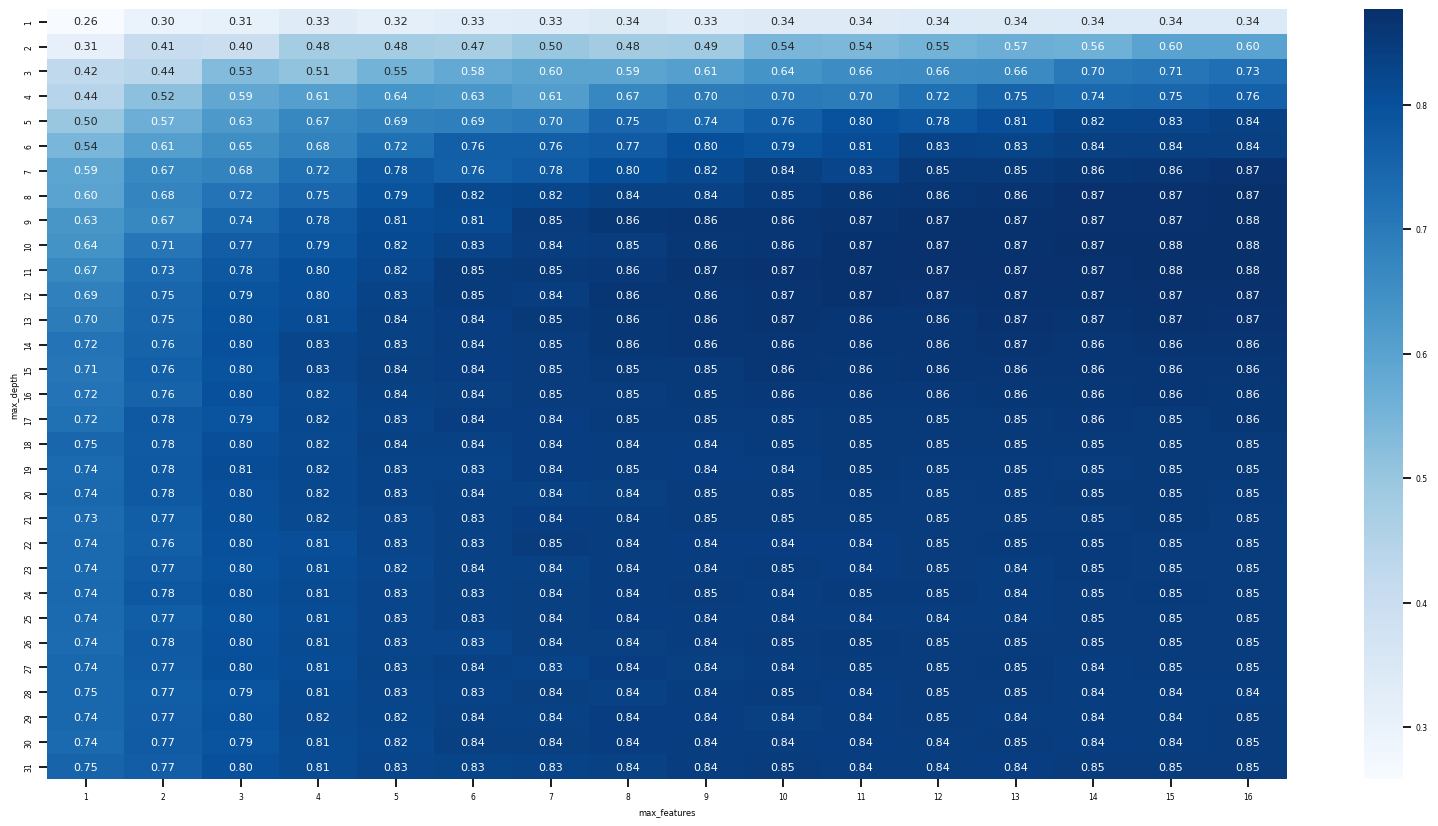

In [19]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import seaborn as sb
import matplotlib.pyplot as plt

num_features = len(input_not_encode.columns)
max_depth = 31

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {
    'max_depth': range(1, max_depth+1),
    'max_features': range(1, num_features+1)
}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(
    estimator=decision_tree_classifier,
    param_grid=parameter_grid,
    cv=cross_validation
)

grid_search.fit(input, target)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))


# Set the figure size and font size
plt.figure(figsize=(20, 10))  # Increase figure size
sb.set_context("notebook", font_scale=0.5)  # Adjust font scale for smaller font


# Visualize the grid search results
grid_visualization = grid_search.cv_results_['mean_test_score']
grid_visualization.shape = (max_depth, num_features)
sb.heatmap(grid_visualization, cmap='Blues', annot=True, fmt=".2f", annot_kws={"size": 8})
plt.xticks(np.arange(num_features) + 0.5, range(1, num_features + 1))  # Correct x-axis labels
plt.yticks(np.arange(max_depth) + 0.5, range(1, max_depth+1))  # Correct y-axis labels
plt.xlabel('max_features')
plt.ylabel('max_depth')


Best score: 0.8776860273463798
Best parameters: {'max_depth': 10, 'max_features': 13}


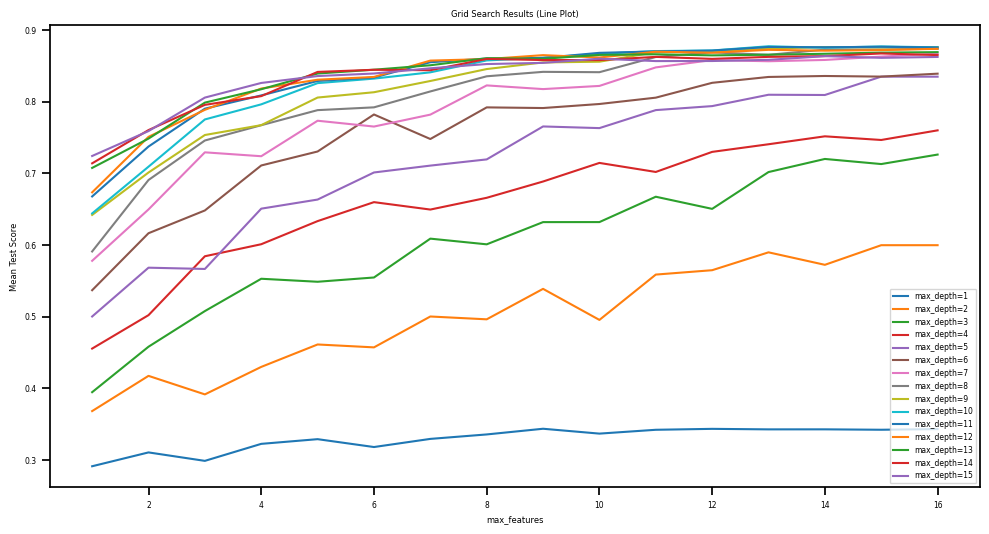

In [23]:
import matplotlib.pyplot as plt

decision_tree_classifier = DecisionTreeClassifier()
num_features = len(input_not_encode.columns)
max_depth = 15

parameter_grid = {
    'max_depth': range(1, max_depth + 1),
    'max_features': range(1, num_features + 1)
}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(
    estimator=decision_tree_classifier,
    param_grid=parameter_grid,
    cv=cross_validation
)

# Fit the GridSearchCV object to the data
grid_search.fit(input, target)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

# Get all parameter combinations
parameters = grid_search.cv_results_['params']

# Get all mean test scores
mean_test_scores = grid_search.cv_results_['mean_test_score']

# Separate mean test scores by max_depth parameter
max_depth_scores = {}
for params, score in zip(parameters, mean_test_scores):
    max_depth = params['max_depth']
    if max_depth not in max_depth_scores:
        max_depth_scores[max_depth] = []
    max_depth_scores[max_depth].append(score)


# Plot the grid search results using a line plot
plt.figure(figsize=(12, 6))
for max_depth, scores in max_depth_scores.items():
    plt.plot(range(1, num_features + 1), scores, label=f'max_depth={max_depth}')
plt.xlabel('max_features')
plt.ylabel('Mean Test Score')
plt.title('Grid Search Results (Line Plot)')
plt.legend()
plt.show()


In [24]:
decision_tree_classifier = DecisionTreeClassifier()

num_features = len(input_not_encode.columns)
max_depth = 15
max_depth_list = list(range(1, max_depth + 1))
max_features_list = list(range(1, num_features + 1))
parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': max_depth_list,
                  'max_features': max_features_list}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(input, target)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.8770602177496111
Best parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 16, 'splitter': 'best'}


In [25]:
decision_tree_classifier = grid_search.best_estimator_
decision_tree_classifier

DecisionTreeClassifier(max_depth=10, max_features=16)

## Analysis of the results

In [26]:
import sklearn.tree as tree
import graphviz

# Export the decision tree as a DOT file
dot_data = tree.export_graphviz(decision_tree_classifier, out_file=None)

# Visualize the decision tree with GraphViz
graph = graphviz.Source(dot_data)
graph.render("appendicitis_decision_tree")  # Save the decision tree as an image file
graph.view()  # Display the decision tree in a window


'appendicitis_decision_tree.pdf'

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
import time

# Best parameters from grid search
best_params = {
    'criterion': 'gini',
    'max_depth': 10,
    'max_features': 16,
    'splitter': 'best'
}

# Initialize the Decision Tree classifier with the best parameters
decision_tree_classifier = DecisionTreeClassifier(**best_params)

# Fit the classifier to the training data
# Assuming 'input' is your feature set and 'target' is the labels
start_time = time.time()
decision_tree_classifier.fit(input, target)
end_time = time.time()

# Make predictions on the same dataset to evaluate
predicted_labels = decision_tree_classifier.predict(input)

# Compute the confusion matrix
cmDT = confusion_matrix(target, predicted_labels)
print('Confusion Matrix:')
print(cmDT)

# Compute precision, recall, accuracy, and F1 score
# Note: Specify 'average' parameter for multi-class classification metrics
precisionDT = precision_score(target, predicted_labels, average='weighted')
print('Precision:', precisionDT)

recallDT = recall_score(target, predicted_labels, average='weighted')
print('Recall:', recallDT)

accuracyDT = accuracy_score(target, predicted_labels)
print('Accuracy:', accuracyDT)

f1DT = f1_score(target, predicted_labels, average='weighted')
print('F1 Score:', f1DT)

# Compute training and prediction time
training_timeDT = end_time - start_time
testing_timeDT = time.time() - end_time
print('Training Time:', training_timeDT)
print('Testing Time:', testing_timeDT)


Confusion Matrix:
[[2385  129    7    2    0    0    0]
 [ 121 2756  158   45    2    0    0]
 [  12  256 1841  284   34    0    0]
 [   0   44  203 2119  151    5    0]
 [   3    4   54  131 2665   49    4]
 [   0    0    0   15   36 3197    0]
 [   1    0    3    0    2    2 4038]]
Precision: 0.9151844961218218
Recall: 0.915357934290394
Accuracy: 0.915357934290394
F1 Score: 0.9151024102318245
Training Time: 0.11060547828674316
Testing Time: 0.0449221134185791


In [9]:
decision_tree_classifier

DecisionTreeClassifier(max_depth=10, max_features=16)

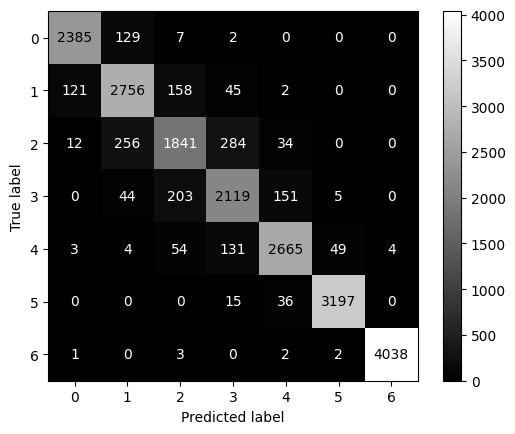

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cmDT)
disp.plot(cmap='gist_gray')

### Solution for Oversampling

In [27]:
import time
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smote = SMOTE(random_state=random_state)

# Only oversample the training data
input_train_res, target_train_res = smote.fit_resample(input_train, target_train)

# Fit the GridSearchCV object to the oversampled data
start_time = time.time()
decision_tree_classifier.fit(input_train_res, target_train_res)
end_time = time.time()

# Get the predicted labels from the best estimator
predicted_labels = decision_tree_classifier.predict(input_test)  # We predict on the original testing data

# Compute the confusion matrix
cm = confusion_matrix(target_test, predicted_labels)  # We compare with the original testing labels
print('Confusion Matrix:')
print('[[TP FN]')
print(' [FP TN]]')
print(cm)

# Compute accuracy
accuracy = accuracy_score(target_test, predicted_labels)
print('Accuracy:', accuracy)

# Compute precision
precision = precision_score(target_test, predicted_labels, average='weighted')
print('Precision:', precision)

# Compute recall
recall = recall_score(target_test, predicted_labels, average='weighted')
print('Recall:', recall)

# Compute F1 score
f1 = f1_score(target_test, predicted_labels, average='weighted')
print('F1 Score:', f1)

# Compute training/testing time
training_time = end_time - start_time
testing_time = time.time() - end_time
print('Training Time:', training_time)
print('Testing Time:', testing_time)

Confusion Matrix:
[[TP FN]
 [FP TN]]
[[477  44   1   0   0   0   0]
 [ 48 524  54   5   1   0   0]
 [  0  57 380  60  14   0   0]
 [  0  11  63 380  41   3   0]
 [  1   0  25  43 475  24   3]
 [  0   0   0   2  24 606   0]
 [  0   0   0   0   0   1 785]]
Accuracy: 0.8735549132947977
Precision: 0.8736396470257274
Recall: 0.8735549132947977
F1 Score: 0.8735520252389591
Training Time: 0.13043665885925293
Testing Time: 0.013373374938964844


### Solution for undersampling

In [22]:
import time
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from imblearn.under_sampling import RandomUnderSampler

# Create an instance of RandomUnderSampler
undersampler = RandomUnderSampler(random_state=random_state)

# Only undersample the training data
input_train_res, target_train_res = undersampler.fit_resample(input_train, target_train)

# Fit the GridSearchCV object to the undersampled data
start_time = time.time()
decision_tree_classifier.fit(input_train_res, target_train_res)
end_time = time.time()

# Get the predicted labels from the best estimator
predicted_labels = decision_tree_classifier.predict(input_test)  # We predict on the original testing data

# Compute the confusion matrix
cm = confusion_matrix(target_test, predicted_labels)  # We compare with the original testing labels
print('Confusion Matrix:')
print('[[TP FN]')
print(' [FP TN]]')
print(cm)

# Compute accuracy
accuracy = accuracy_score(target_test, predicted_labels)
print('Accuracy:', accuracy)

# Compute precision
precision = precision_score(target_test, predicted_labels, average='weighted')
print('Precision:', precision)

# Compute recall
recall = recall_score(target_test, predicted_labels, average='weighted')
print('Recall:', recall)

# Compute F1 score
f1 = f1_score(target_test, predicted_labels, average='weighted')
print('F1 Score:', f1)


# Compute training/testing time
training_time = end_time - start_time
testing_time = time.time() - end_time
print('Training Time:', training_time)
print('Testing Time:', testing_time)

Confusion Matrix:
[[TP FN]
 [FP TN]]
[[485  37   0   0   0   0   0]
 [ 43 522  55  11   1   0   0]
 [  0  47 379  72  13   0   0]
 [  0   9  64 379  40   6   0]
 [  1   0  22  40 483  22   3]
 [  0   0   0   2  26 604   0]
 [  0   0   0   0   1   1 784]]
Accuracy: 0.8757225433526011
Precision: 0.8759596062502973
Recall: 0.8757225433526011
F1 Score: 0.8757974702008696
Training Time: 0.07808089256286621
Testing Time: 0.013774394989013672


# Getting results

In [40]:
import pandas as pd
df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
my_encode(df)
my_encode(test_df)
test_df.head()

id  Gender        Age    Height      Weight  \
0  20758       1  26.899886  1.848294  120.644178   
1  20759       0  21.000000  1.600000   66.000000   
2  20760       0  26.000000  1.643355  111.600553   
3  20761       1  20.979254  1.553127  103.669116   
4  20762       0  26.000000  1.627396  104.835346   

   family_history_with_overweight  FAVC      FCVC       NCP  CAEC  SMOKE  \
0                               1     1  2.938616  3.000000     1      0   
1                               1     1  2.000000  1.000000     1      0   
2                               1     1  3.000000  3.000000     1      0   
3                               1     1  2.000000  2.977909     1      0   
4                               1     1  3.000000  3.000000     1      0   

       CH2O  SCC       FAF       TUE  CALC  MTRANS  
0  2.825629    0  0.855400  0.000000     1       2  
1  3.000000    0  1.000000  0.000000     1       2  
2  2.621877    0  0.000000  0.250502     1       2  
3  2.786417    0  0.094851  0.000000     1       2  
4  2.653531    0  0.000000  0.741069     1       2

In [47]:
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]
X_test_df = test_df.iloc[:, 1:]

In [48]:
X_test_df.head()

Gender        Age    Height      Weight  family_history_with_overweight  \
0       1  26.899886  1.848294  120.644178                               1   
1       0  21.000000  1.600000   66.000000                               1   
2       0  26.000000  1.643355  111.600553                               1   
3       1  20.979254  1.553127  103.669116                               1   
4       0  26.000000  1.627396  104.835346                               1   

   FAVC      FCVC       NCP  CAEC  SMOKE      CH2O  SCC       FAF       TUE  \
0     1  2.938616  3.000000     1      0  2.825629    0  0.855400  0.000000   
1     1  2.000000  1.000000     1      0  3.000000    0  1.000000  0.000000   
2     1  3.000000  3.000000     1      0  2.621877    0  0.000000  0.250502   
3     1  2.000000  2.977909     1      0  2.786417    0  0.094851  0.000000   
4     1  3.000000  3.000000     1      0  2.653531    0  0.000000  0.741069   

   CALC  MTRANS  
0     1       2  
1     1       2  
2     1       2  
3     1       2  
4     1       2

In [49]:
X = X.values
y = y.values
X_test_df = X_test_df.values

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

# Best parameters from grid search
best_params = {
    'criterion': 'gini',
    'max_depth': 10,
    'max_features': 16,
    'splitter': 'best'
}

decision_tree_classifier = DecisionTreeClassifier(**best_params)

decision_tree_classifier.fit(X, y)

predicted_labels = decision_tree_classifier.predict(X_test_df)

test_df['NObeyesdad'] = predicted_labels

In [51]:
test_df.head()

id  Gender        Age    Height      Weight  \
0  20758       1  26.899886  1.848294  120.644178   
1  20759       0  21.000000  1.600000   66.000000   
2  20760       0  26.000000  1.643355  111.600553   
3  20761       1  20.979254  1.553127  103.669116   
4  20762       0  26.000000  1.627396  104.835346   

   family_history_with_overweight  FAVC      FCVC       NCP  CAEC  SMOKE  \
0                               1     1  2.938616  3.000000     1      0   
1                               1     1  2.000000  1.000000     1      0   
2                               1     1  3.000000  3.000000     1      0   
3                               1     1  2.000000  2.977909     1      0   
4                               1     1  3.000000  3.000000     1      0   

       CH2O  SCC       FAF       TUE  CALC  MTRANS  NObeyesdad  
0  2.825629    0  0.855400  0.000000     1       2           5  
1  3.000000    0  1.000000  0.000000     1       2           2  
2  2.621877    0  0.000000  0.250502     1       2           6  
3  2.786417    0  0.094851  0.000000     1       2           4  
4  2.653531    0  0.000000  0.741069     1       2           6

In [54]:
my_decode(test_df)

In [55]:
test_df.head()

id  Gender        Age    Height      Weight  \
0  20758       1  26.899886  1.848294  120.644178   
1  20759       0  21.000000  1.600000   66.000000   
2  20760       0  26.000000  1.643355  111.600553   
3  20761       1  20.979254  1.553127  103.669116   
4  20762       0  26.000000  1.627396  104.835346   

   family_history_with_overweight  FAVC      FCVC       NCP  CAEC  SMOKE  \
0                               1     1  2.938616  3.000000     1      0   
1                               1     1  2.000000  1.000000     1      0   
2                               1     1  3.000000  3.000000     1      0   
3                               1     1  2.000000  2.977909     1      0   
4                               1     1  3.000000  3.000000     1      0   

       CH2O  SCC       FAF       TUE  CALC  MTRANS          NObeyesdad  
0  2.825629    0  0.855400  0.000000     1       2     Obesity_Type_II  
1  3.000000    0  1.000000  0.000000     1       2  Overweight_Level_I  
2  2.621877    0  0.000000  0.250502     1       2    Obesity_Type_III  
3  2.786417    0  0.094851  0.000000     1       2      Obesity_Type_I  
4  2.653531    0  0.000000  0.741069     1       2    Obesity_Type_III

In [58]:
res_df = test_df[['id', 'NObeyesdad']]

In [60]:
print(len(res_df))
res_df.head()

13840


id          NObeyesdad
0  20758     Obesity_Type_II
1  20759  Overweight_Level_I
2  20760    Obesity_Type_III
3  20761      Obesity_Type_I
4  20762    Obesity_Type_III

In [62]:
res_df.to_csv('res_decision_tree.csv', index=False)

## **Neural Network Model** <a class="anchor" id="NN" name="NN"></a>
[Go to Top](#TOC)

In [63]:
import pandas as pd
df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
my_encode(df)
my_encode(test_df)

input = df.iloc[:, 1:-1]
target = df.iloc[:, -1]
X_test_df = test_df.iloc[:, 1:]

input = input.values
target = target.values
X_test_df = X_test_df.values

input_train, input_test, target_train, target_test = train_test_split(input, target, test_size=0.25)

2024-02-04 22:39:19.184923: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-04 22:39:19.529937: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-04 22:39:19.530272: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Training time: 98.00411295890808
163/163 [==============================] - 0s 1ms/step
Testing time: 0.39418983459472656
Accuracy: 0.8433526011560694
Confusion Matrix:
 [[620  38   2   1   0   0   0]
 [103 650  38   8   2   0   0]
 [  4 105 363 125  20   0   0]
 [  0  23  66 432 102   3   0]
 [  1   3   4  68 613  26   7]
 [  0   0   0   7  53 734   2]
 [  0   0   0   0   1   1 965]]
Precision: 0.8432353733523497
Recall: 0.8433526011560694
F1 Score: 0.8412973831021728


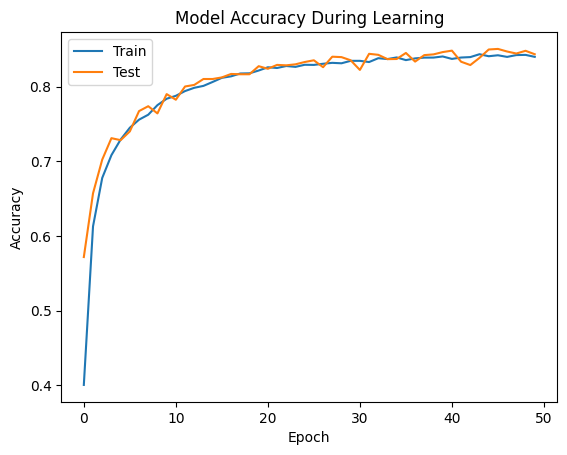

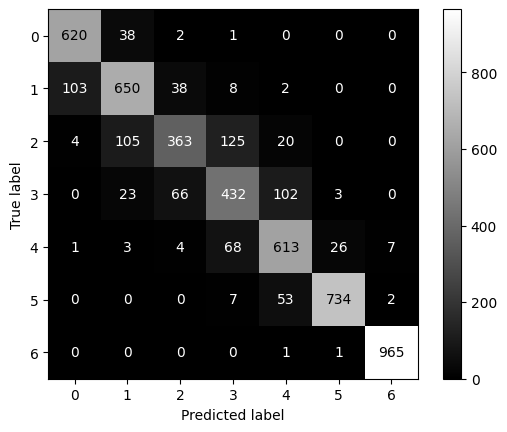

In [66]:
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming target_train and target_test are categorical and should be one-hot encoded
target_train_one_hot = to_categorical(target_train)
target_test_one_hot = to_categorical(target_test)

# Update the output layer with the number of neurons equal to the number of classes
# and 'softmax' activation function for multi-class classification
num_classes = target_train_one_hot.shape[1]

model = Sequential()
model.add(Dense(32, input_dim=input_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Changed for multi-class

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
start_time = time.time()
history = model.fit(input_train, target_train_one_hot, epochs=50, batch_size=25, verbose=0, validation_data=(input_test, target_test_one_hot))
training_time = time.time() - start_time
print("Training time:", training_time)

# Predicting with the model
start_time = time.time()
target_pred_prob = model.predict(input_test)
target_pred = target_pred_prob.argmax(axis=-1)  # Changed for multi-class
testing_time = time.time() - start_time
print("Testing time:", testing_time)

# Evaluation metrics for multi-class
accuracy = accuracy_score(target_test, target_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(target_test, target_pred)
print("Confusion Matrix:\n", conf_matrix)

precision = precision_score(target_test, target_pred, average='weighted')
print("Precision:", precision)

recall = recall_score(target_test, target_pred, average='weighted')
print("Recall:", recall)

f1 = f1_score(target_test, target_pred, average='weighted')
print("F1 Score:", f1)

# Plot the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy During Learning')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='gist_gray')
plt.show()


163/163 [==============================] - 0s 1ms/step
Accuracy: 0.8639691714836224
Confusion Matrix:
[[ 536  100    2    1    1    0    0]
 [  40  665   66    9    0    0    0]
 [   1   72  425  101   12    0    0]
 [   0   15   73  491   42   11    0]
 [   2    0   10   93  542   34    4]
 [   0    0    0    4   10  810    1]
 [   0    0    0    0    1    1 1015]]
Precision: 0.8541909734265914
Recall: 0.847662334409087
F1 Score: 0.8495540720967595


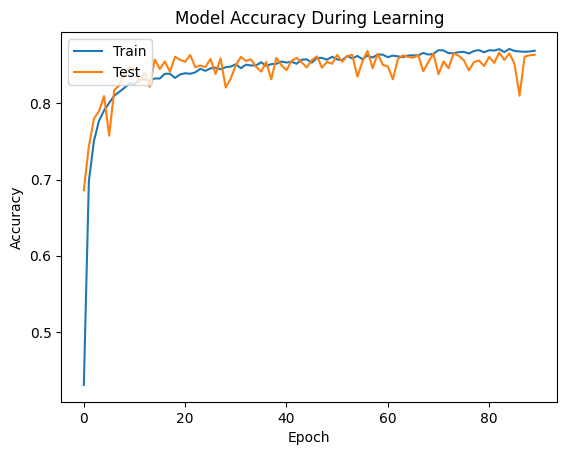

In [75]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Load and preprocess the data
df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
my_encode(df)  # Assuming this function also one-hot encodes the target variable
my_encode(test_df)

# Splitting features and target
input = df.iloc[:, 1:-1].values
target = df.iloc[:, -1].values  # Assuming this is now one-hot encoded
X_test_df = test_df.iloc[:, 1:].values

from tensorflow.keras.utils import to_categorical

# Assuming 'target' is a 1D numpy array of integer class labels before splitting
num_classes = np.unique(target).shape[0]  # Determine the number of unique classes
target = to_categorical(target, num_classes=num_classes)  # One-hot encode

# Now, split the data again
input_train, input_test, target_train, target_test = train_test_split(input, target, test_size=0.25, random_state=42)

# Define the model architecture
model = Sequential()
model.add(Dense(128, input_dim=input_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(target_train.shape[1], activation='softmax'))  # Correct for one-hot encoded target

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
start_time = time.time()
history = model.fit(input_train, target_train, epochs=90, batch_size=10, verbose=0, validation_data=(input_test, target_test))
training_time = time.time() - start_time

# Evaluate the model
start_time = time.time()
target_pred = model.predict(input_test)
testing_time = time.time() - start_time
target_pred_classes = np.argmax(target_pred, axis=1)
target_test_classes = np.argmax(target_test, axis=1)

# Scoring
accuracy = accuracy_score(target_test_classes, target_pred_classes)
conf_matrix = confusion_matrix(target_test_classes, target_pred_classes)
precision = precision_score(target_test_classes, target_pred_classes, average='macro')
recall = recall_score(target_test_classes, target_pred_classes, average='macro')
f1 = f1_score(target_test_classes, target_pred_classes, average='macro')

# Print evaluation metrics
print(f"Accuracy: {accuracy}\nConfusion Matrix:\n{conf_matrix}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}")

# Plot accuracy during learning
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy During Learning')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [87]:
model

# Results

In [78]:
# Assuming the model is already trained and X_test_df is preprocessed similarly to training data

# Predict the test dataset
test_predictions_prob = model.predict(X_test_df)
test_pred_classes = np.argmax(test_predictions_prob, axis=1)

# Optional: Convert class indices to class labels if you have label encoding
# This step is necessary if your classes are not simply 0, 1, 2, ..., N but instead have specific labels
# For example, if you used a LabelEncoder or have a dictionary mapping of classes, you would reverse that mapping here

# Example of converting indices to labels (uncomment and adjust according to your setup)
# class_labels = {0: 'Class1', 1: 'Class2', ...}  # Define this based on your actual class labels
# test_pred_labels = [class_labels[idx] for idx in test_pred_classes]

# Output or save your predictions
# For simplicity, here we just print the first few predictions
print("First few predictions:", test_pred_classes[:10])
# If you converted indices to labels, print those instead
# print("First few predictions with labels:", test_pred_labels[:10])

# Depending on your requirements, you may save these predictions to a CSV file or use them in further analysis.


433/433 [==============================] - 1s 1ms/step
First few predictions: [5 2 6 4 6 0 0 2 3 1]


In [81]:
# Append the prediction results as a new column to test_df
test_df['NObeyesdad'] = test_pred_classes

# If you have converted indices to labels and prefer to use the actual class labels instead
# Uncomment the following line and make sure `test_pred_labels` is defined as shown in the previous example
# test_df['predicted_class_label'] = test_pred_labels

# Display the first few rows of test_df to verify the predictions are appended
print(test_df.head())

res_df = test_df[['id', 'NObeyesdad']]

my_decode(res_df)
# If you need to save this updated DataFrame to a CSV file:
res_df.to_csv('NN_predictions.csv', index=False)


      id  Gender        Age    Height      Weight  \
0  20758       1  26.899886  1.848294  120.644178   
1  20759       0  21.000000  1.600000   66.000000   
2  20760       0  26.000000  1.643355  111.600553   
3  20761       1  20.979254  1.553127  103.669116   
4  20762       0  26.000000  1.627396  104.835346   

   family_history_with_overweight  FAVC      FCVC       NCP  CAEC  SMOKE  \
0                               1     1  2.938616  3.000000     1      0   
1                               1     1  2.000000  1.000000     1      0   
2                               1     1  3.000000  3.000000     1      0   
3                               1     1  2.000000  2.977909     1      0   
4                               1     1  3.000000  3.000000     1      0   

       CH2O  SCC       FAF       TUE  CALC  MTRANS  NObeyesdad  
0  2.825629    0  0.855400  0.000000     1       2           5  
1  3.000000    0  1.000000  0.000000     1       2           2  
2  2.621877    0  0.000000  0

/tmp/ipykernel_82654/572646068.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_df['NObeyesdad'] = res_df['NObeyesdad'].map(reverse_obesity_map)


# improve results

In [88]:
# Load and preprocess the data
df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
my_encode(df)  # Assuming this function also one-hot encodes the target variable
my_encode(test_df)

# Splitting features and target
input = df.iloc[:, 1:-1].values
target = df.iloc[:, -1].values  # Assuming this is now one-hot encoded
X_test_df = test_df.iloc[:, 1:].values

In [89]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import numpy as np
import time

# Assuming 'input' and 'target' are already defined
# Ensure 'target' is one-hot encoded for multi-class classification
num_classes = len(np.unique(target))  # Determine the number of unique classes
target = to_categorical(target, num_classes=num_classes)

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Define the K-fold Cross Validator
kfold = KFold(n_splits=9, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1

# Record the current time
start_time = time.time()

for train, test in kfold.split(input, target):

    # Define the model architecture for multi-class classification
    model = Sequential()
    model.add(Dense(128, input_dim=input.shape[1], activation='relu'))
    model.add(Dense(64, activation='relu')) 
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu')) 
    model.add(Dense(num_classes, activation='softmax'))  # Adjusted for multi-class

    # Compile the model for multi-class classification
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    history = model.fit(input[train], target[train], epochs=90, batch_size=10, verbose=0)

    # Generate generalization metrics
    scores = model.evaluate(input[test], target[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1

# Calculate the time taken
total_timeNN = time.time() - start_time
print(f'Total time taken: {total_timeNN} seconds')

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')


------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 0.44953495264053345; accuracy of 83.74512195587158%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 0.3879985213279724; accuracy of 86.38924956321716%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss of 0.3765362501144409; accuracy of 86.08582615852356%
------------------------------------------------------------------------
Training for fold 4 ...
Score for fold 4: loss of 0.43004775047302246; accuracy of 86.08582615852356%
------------------------------------------------------------------------
Training for fold 5 ...


KeyboardInterrupt: 

In [ ]:
target_pred = (model.predict(input_test) > 0.5).astype("int32")

# Print the final score/accuracy
accuracyNN = accuracy_score(target_test, target_pred)
print("Accuracy:", accuracyNN)

# Print the confusion matrix
conf_matrixNN = confusion_matrix(target_test, target_pred)
print("Confusion Matrix:\n", conf_matrixNN)

# Print the precision score
precisionNN = precision_score(target_test, target_pred)
print("Precision:", precisionNN)

# Print the recall score
recallNN = recall_score(target_test, target_pred)
print("Recall:", recallNN)

# Print the F1 score
f1NN = f1_score(target_test, target_pred)
print("F1 Score:", f1NN)

# Print total time
print("Total time taken to train the model:", total_timeNN)

## **Support Vector Machine** <a class="anchor" id="SVM" name="SVM"></a>
[Go to Top](#TOC)

## **Logistic Regression** <a class="anchor" id="logistic_regression" name="logistic_regression"></a>
[Go to Top](#TOC)

In [7]:
# Load and preprocess the data
df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
my_encode(df) 
my_encode(test_df)

input = df.iloc[:, 1:-1].values
target = df.iloc[:, -1].values
X_test = test_df.iloc[:, 1:].values

# Split the data into training and validation sets
input_train, input_val, target_train, target_val = train_test_split(input, target, test_size=0.1, random_state=42)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Initialize and train the Logistic Regression model
# Note: Increase `max_iter` if the model doesn't converge
lr_model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs', random_state=42)
lr_model.fit(input_train, target_train)

# Predict on the validation set
target_pred = lr_model.predict(input_val)

# Calculate accuracy
accuracy = accuracy_score(target_val, target_pred)
print(f'Validation Accuracy: {accuracy}')

# If you want to make predictions on your test set (X_test)
# Ensure X_test is preprocessed similarly to your training data
test_predictions = lr_model.predict(X_test)
# You can now use `test_predictions` for further analysis or export


Validation Accuracy: 0.8482658959537572


/home/david/Desktop/py/Obesity Risk/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
# Parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'newton-cg', 'sag'],
    'penalty': ['l2']
}

# Grid search
grid_search = GridSearchCV(LogisticRegression(max_iter=10, multi_class='multinomial', random_state=42),
                           param_grid, cv=5, scoring='accuracy', verbose=1)

grid_search.fit(input_train, target_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best validation accuracy:", grid_search.best_score_)

# Use the best model to predict on the validation set
best_model = grid_search.best_estimator_
target_pred = best_model.predict(input_val)

# Calculate accuracy
accuracy = accuracy_score(target_val, target_pred)
print(f'Validation Accuracy with Best Model: {accuracy}')


Fitting 5 folds for each of 15 candidates, totalling 75 fits


/home/david/Desktop/py/Obesity Risk/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/david/Desktop/py/Obesity Risk/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
Best validation accuracy: 0.700032231650736
Validation Accuracy with Best Model: 0.7003853564547207


/home/david/Desktop/py/Obesity Risk/.venv/lib/python3.11/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


# Random Forests

In [29]:
# Load and preprocess the data
df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
my_encode(df) 
my_encode(test_df)

input = df.iloc[:, 1:-1].values
target = df.iloc[:, -1].values
X_test = test_df.iloc[:, 1:].values

# Split the data into training and validation sets
x_train, x_test, y_train, y_test = train_test_split(input, target, test_size=0.01, random_state=42)


In [10]:
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
RF_param = {'n_estimators': [100,150,200,250,300], 'max_depth':[4,5,6,7,8,9]}
RF = ensemble.RandomForestClassifier(random_state=42)
GSCV = GridSearchCV(RF, param_grid=RF_param, cv=5)
GSCV.fit(input_train, target_train)

print('The best model param:', GSCV.best_params_)
     

The best model param: {'max_depth': 9, 'n_estimators': 300}


In [30]:
RF = ensemble.RandomForestClassifier(n_estimators=300, max_depth=9, random_state=42)
RF.fit(x_train, y_train)

y_pred = RF.predict(x_test)

print('RF_train_score = ', RF.score(x_train, y_train))
print('RF_test_score = ', RF.score(x_test, y_test))
     
# RF_train_score =  0.9158013060700139
# RF_test_score =  0.8882466281310212

RF_train_score =  0.9147445255474452
RF_test_score =  0.8942307692307693


In [39]:
RF = ensemble.RandomForestClassifier(n_estimators=5000, max_depth=50, random_state=42)
RF.fit(x_train, y_train)

y_pred = RF.predict(x_test)

print('RF_train_score = ', RF.score(x_train, y_train))
print('RF_test_score = ', RF.score(x_test, y_test))
     
# RF_train_score =  0.9158013060700139
# RF_test_score =  0.8882466281310212

# RF_train_score =  1.0
# RF_test_score =  0.9086538461538461

# RF_train_score =  1.0
# RF_test_score =  0.9134615384615384

RF_train_score =  1.0
RF_test_score =  0.9134615384615384


In [41]:
RF = ensemble.RandomForestClassifier(n_estimators=5000, max_depth=50, random_state=42)
RF.fit(input, target)

# Predicting the target for test_df
test_predictions = RF.predict(X_test)

# Optionally, you might want to add these predictions back to test_df for analysis or export
test_df['NObeyesdad'] = test_predictions

res_df = test_df[['id', 'NObeyesdad']]

my_decode(res_df)
res_df.head()
res_df.to_csv('Random_Forests_predictions.csv', index=False)


/tmp/ipykernel_92783/572646068.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_df['NObeyesdad'] = res_df['NObeyesdad'].map(reverse_obesity_map)
